# The Lorenz Equations

Consider the Lorenz equations:

$$
\begin{align*}
\dot{x}&=\sigma(y-x) \\
\dot{y}&=rx-y-xz \\
\dot{z}&=xy- bz
\end{align*}
$$
### Import relevant Python packages

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Define a function that evaluates the right-hand side of the Lorenz equations

The function takes in two inputs: time and 'state'. 'State' is a vector of \[x,y,z\] values. It returns the rate of change of the state, which is given by the right-hand side of an equation of the form $\dot{x}=f(x)$. We leave 'time' as one of the input variables accepted by the function to keep things general; in this particular system, $f$ has no time-dependence, and that input is not used by the function.

In [2]:
def lorenz_rhs(t,state,s,r,b):
    # Break up state variable into 3:
    x,y,z = state

    dxdt = s*(y-x)
    dydt = r*x - y - x*z
    dzdt = x*y - b*z

    # Assemble
    return [dxdt,dydt,dzdt]

## First, the usual values

### Set up Lorenz's usual parameters

We choose an arbitrary initial condition; it doesn't matter much here, because basically any point in phase space will eventually end up on the 'strange attractor' discovered by Lorenz. 

We choose a time-span of 50 time units, and plot it 10,000 times to get nice and smooth curves.

In [3]:
# Initial condition
y0 = [0.9, 0.0, 0.0]

# Time span for the solution (start time, end time)
t_span = (0, 50)

# Plot the solution at the following times:
tvals = np.linspace(0,t_span[1],10000)

# Solve the ODE
solution1 = solve_ivp(lorenz_rhs, # system of equations
                      t_span, # time span of integration
                      y0, # initial conditions
                      args=(10,28,8/3), # parameters
                      t_eval=tvals, # times at which to store solution
                      method='RK45' # method of integration
                     )

### Plot Lorenz's solution

On the left-hand side, we plot the full 3-dimensional phase space. On the right-hand side, we plot one of the variables against time.

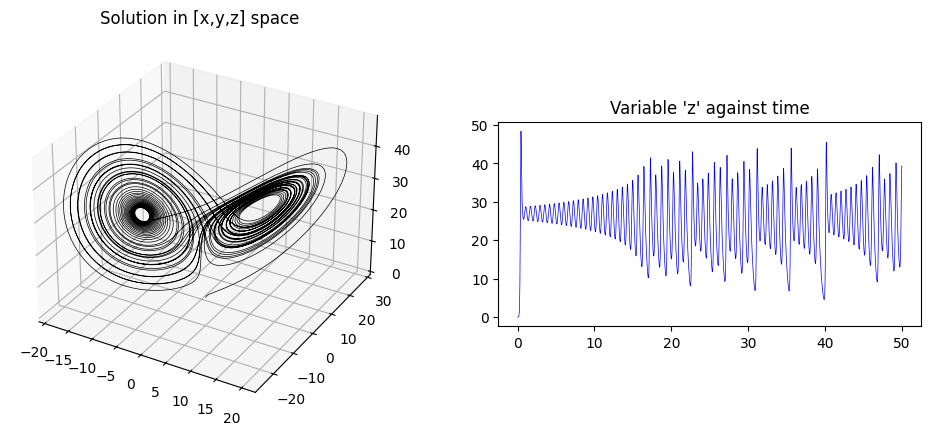

In [4]:
fig1 = plt.figure(dpi=100,figsize=(12,5))

# 3-d plot
ax1_1 = fig1.add_subplot(1,2,1, projection='3d')
ax1_1.plot(solution1.y[0], solution1.y[1], solution1.y[2], lw=0.5, color='black')
ax1_1.set_title("Solution in [x,y,z] space ")

# time-trace
ax1_2 = fig1.add_subplot(1, 2, 2)
ax1_2.set_aspect(1/2)
ax1_2.plot(solution1.t, solution1.y[2], lw=0.5, color='blue')
ax1_2.set_title("Variable 'z' against time")

plt.show()

## Now for some new values: try r = 100

This time, create a new \`solve_ivp\` object, using different integration times and parameter values as needed.

### Solve the ODE again

In [5]:
# Solve the ODE
t_end2 = 70
solution2 = solve_ivp(lorenz_rhs, # system of equations
                      (0, t_end2), # time span of integration
                      [0.0, 1.0, 0.0], # initial conditions
                      args=(10,100,8/3), # parameters
                      t_eval=np.linspace(0,t_end2,10000), # times at which to store solution
                     )

### Then, plot the solution

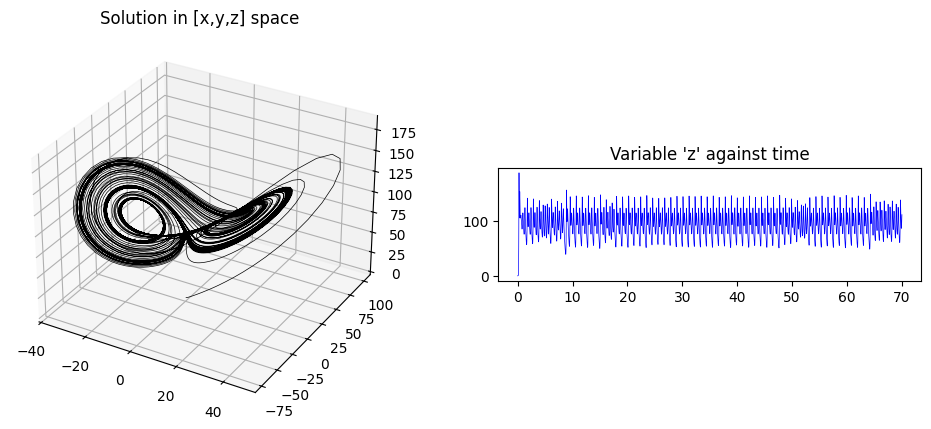

In [6]:
fig2 = plt.figure(dpi=100,figsize=(12,5))

# 3-d plot
ax2_1 = fig2.add_subplot(1,2,1, projection='3d')
ax2_1.plot(solution2.y[0], solution2.y[1], solution2.y[2], lw=0.5, color='black')
ax2_1.set_title("Solution in [x,y,z] space ")

# time-trace
ax2_2 = fig2.add_subplot(1, 2, 2)
ax2_2.set_aspect(0.1)
ax2_2.plot(solution2.t, solution2.y[2], lw=0.5, color='blue')
ax2_2.set_title("Variable 'z' against time")

plt.show()

### Take a closer look at the last few time units:

In Python, you can solve over a large range of times and choose to plot only a subset of those times. Let us use this fact to plot the **last 1,000** time units only:

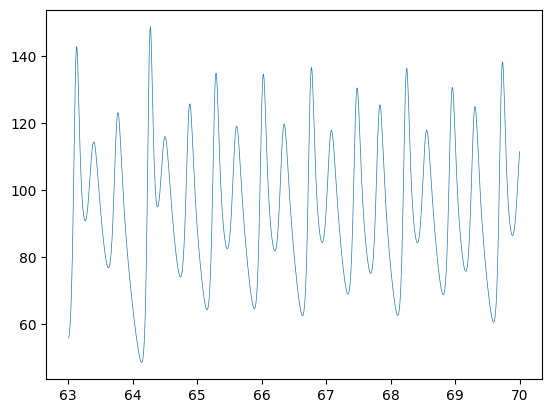

In [7]:
plt.plot(solution2.t[-1000:],solution2.y[2][-1000:],lw=0.5)

What do you notice?

## Next, try: r = 101, r = 150, r = 170, and r = 215

For these, focus on the time-trace plots of any of the three variables x,y, and/or z. 

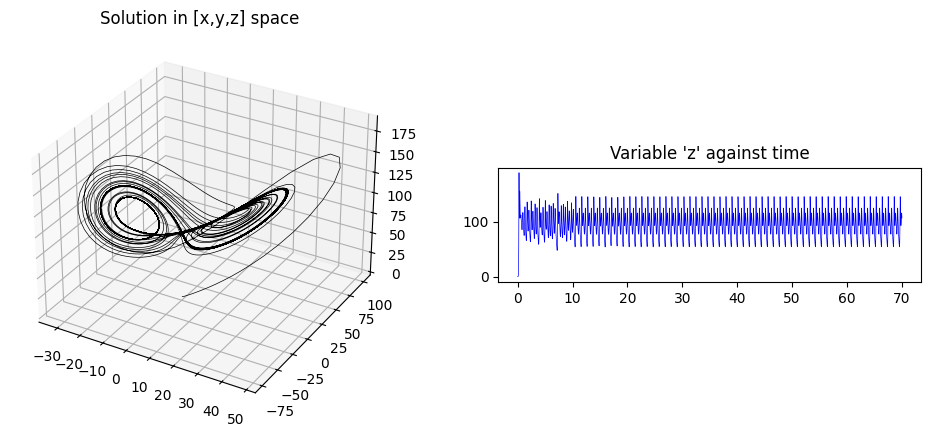

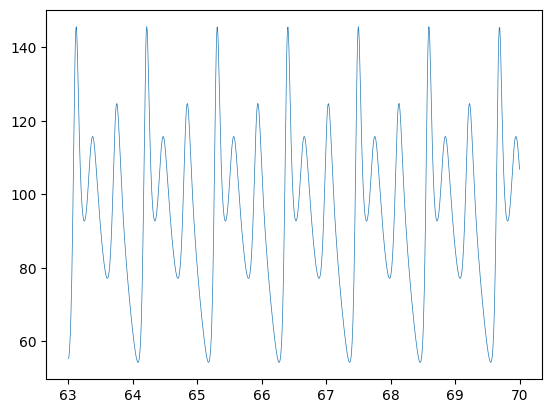

In [31]:
# Solve the ODE
t_end3 = 70
solution3 = solve_ivp(lorenz_rhs, # system of equations
                      (0, t_end3), # time span of integration
                      [0.0, 1.0, 0.0], # initial conditions
                      args=(10,101,8/3), # parameters
                      t_eval=np.linspace(0,t_end3,10000), # times at which to store solution
                     )
fig3 = plt.figure(dpi=100,figsize=(12,5))

# 3-d plot
ax3_1 = fig3.add_subplot(1,2,1, projection='3d')
ax3_1.plot(solution3.y[0], solution3.y[1], solution3.y[2], lw=0.5, color='black')
ax3_1.set_title("Solution in [x,y,z] space ")

# time-trace
ax3_2 = fig3.add_subplot(1, 2, 2)
ax3_2.set_aspect(0.1)
ax3_2.plot(solution3.t, solution3.y[2], lw=0.5, color='blue')
ax3_2.set_title("Variable 'z' against time")

plt.show()

plt.plot(solution3.t[-1000:],solution3.y[2][-1000:],lw=0.5)
